In this notebook, we're going to talk about how we can load and manipulate image files.

# Important: Run this code cell each time you start a new session!

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install os
!pip install opencv-python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [2]:
!wget -Ncnp https://images.fineartamerica.com/images-medium-large-5/coloured-mri-scan-of-brain-in-sagittal-se-geoff-tompkinson.jpg

--2024-06-28 03:18:27--  https://images.fineartamerica.com/images-medium-large-5/coloured-mri-scan-of-brain-in-sagittal-se-geoff-tompkinson.jpg
Resolving images.fineartamerica.com (images.fineartamerica.com)... 99.84.191.30, 99.84.191.85, 99.84.191.126, ...
Connecting to images.fineartamerica.com (images.fineartamerica.com)|99.84.191.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278914 (272K) [image/jpeg]
Saving to: ‘coloured-mri-scan-of-brain-in-sagittal-se-geoff-tompkinson.jpg’

coloured-mri-scan-o 100%[===================>] 272.38K  --.-KB/s    in 0.01s   

2024-06-28 03:18:27 (22.9 MB/s) - ‘coloured-mri-scan-of-brain-in-sagittal-se-geoff-tompkinson.jpg’ saved [278914/278914]



In [3]:
import shutil
import os
orig_file = os.path.join('coloured-mri-scan-of-brain-in-sagittal-se-geoff-tompkinson.jpg')

os.rename(orig_file, 'color_mri.jpg')

# Loading Images

As you have seen in some of our earlier notebooks, we can load images using the function `cv2.imread()`. The function returns the image as a `numpy` array of `uint8` values. Let's open an image of a skin lesion:

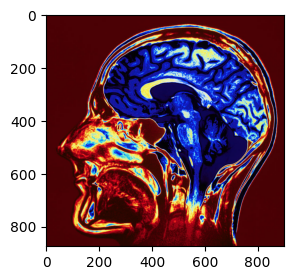

In [4]:
img = cv2.imread('color_mri.jpg')

plt.figure(figsize=(5, 3))
plt.imshow(img)
plt.show()

Notice that this image doesn't look atypical heatmap. `opencv` actually loads images in BGR (blue-green-red) rather than in RGB (red-green-blue). This is because hardware and software manufacturers historically represented color images in the BGR format, and this convention is baked into `opencv`.

`opencv` has its own function for displaying BGR images as you would expect: `cv2.imshow()`. However, this function does not interface well with Jupyter notebooks, so Google Colab provides a function called `cv2_imshow()` that achieves the same functionality:

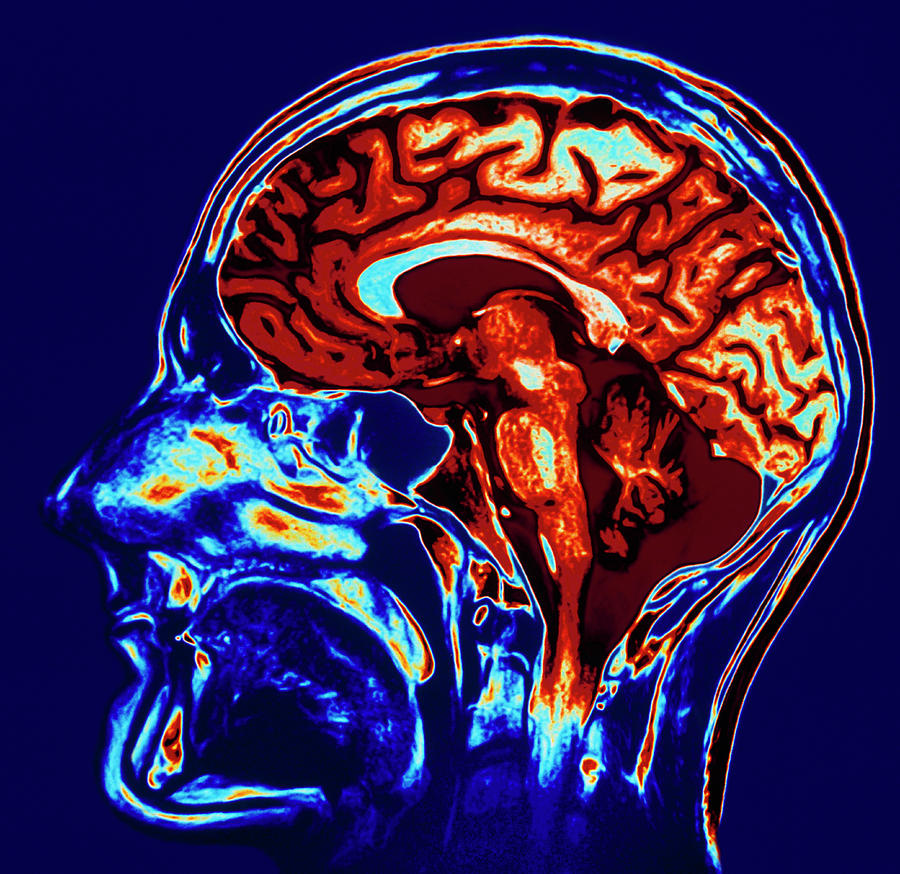

In [5]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

Still, working with images in BGR can be counterintuitive considering that the standard is now RGB. Therefore, it's usually good practice to convert your image from BGR to RGB immediately after loading it:

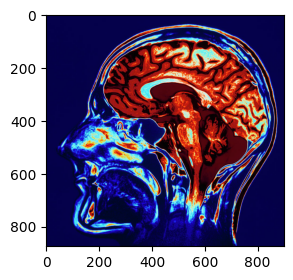

In [6]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 3))
plt.imshow(img_rgb)
plt.show()

Note that this conversion is actually fairly straightforward, as all it is doing is switching the first and third color channels.

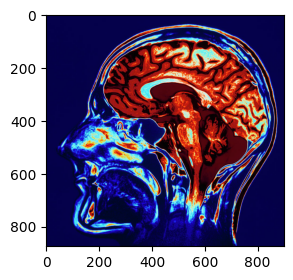

In [7]:
# The manual way of converting from BGR to RGB
img = cv2.imread('color_mri.jpg')
img_b = img[:, :, 0].copy()
img[:, :, 0] = img[:, :, 2]
img[:, :, 2] = img_b

plt.figure(figsize=(5, 3))
plt.imshow(img)
plt.show()

If we want to compute the dimensions of our image, we can pull them from the attribute `.shape`:

In [8]:
h, w, ch = img.shape
print(f'Height: {h}, Width: {w}, Number of color channels: {ch}')

Height: 874, Width: 900, Number of color channels: 3


# Cropping

Since images are encoded as `numpy` arrays, cropping is as simple as slicing the array according to a set of indeces. Remember that `numpy` indexing requires specifying rows before columns. That means slicing an array should take the form `img[startY:endY, startX:endX]`, where `(startX, startY)` and `(endX, endY)` are the top-left and bottom-right corners respective of our ***region of interest (ROI)***, i.e., the subset of the image that is relevant or significant for further analysis.

If you already know the corners of your ROI, you can simply use the syntax described above to crop:

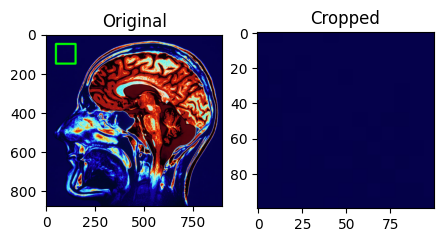

In [9]:
startX = 50 #@param {type:"slider", min:0, max:850, step:50}
startY = 50 #@param {type:"slider", min:0, max:850, step:50}
endX = 150 #@param {type:"slider", min:0, max:850, step:50}
endY = 150 #@param {type:"slider", min:0, max:850, step:50}

# Check that the crop is valid
if startX >= endX or startY >= endY:
    raise Exception('Invalid slice')

# Draw the crop region on an image copy
img_rect = cv2.rectangle(img.copy(), (startX, startY), (endX, endY),
 (0, 255, 0), 10)

# Extract the ROI
img_crop = img[startY:endY, startX:endX]

# Show the results
plt.figure(figsize=(5, 3))
plt.subplot(1, 2, 1), plt.imshow(img_rect), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(img_crop), plt.title('Cropped')
plt.show()

In other situations, however, you might find it more helpful to explain the ROI according to a single coordinate and the size of the box. Let's say we know the top-left corner and the size of our ROI. We could then do the following:

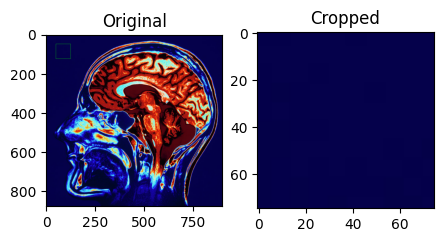

In [10]:
startX = 50 #@param {type:"slider", min:0, max:850, step:50}
startY = 50 #@param {type:"slider", min:0, max:850, step:50}
width = 75 #@param {type:"slider", min:0, max:850, step:50}
height = 75 #@param {type:"slider", min:0, max:850, step:50}

# Compute bottom right coordinate
endX = startX + width
endY = startY + height

# Check that the crop is valid
if endX >= img.shape[1] or endY >= img.shape[0]:
    raise Exception('Invalid slice')

# Draw the crop region on an image copy
img_rect = cv2.rectangle(img.copy(), (startX, startY), (endX, endY),
 (0, 255, 0), 1)

# Extract the ROI
img_crop = img[startY:endY, startX:endX]

# Show the results
plt.figure(figsize=(5, 3))
plt.subplot(1, 2, 1), plt.imshow(img_rect), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(img_crop), plt.title('Cropped')
plt.show()

# Resizing

To resize an image, we can use the function `cv2.resize()`:

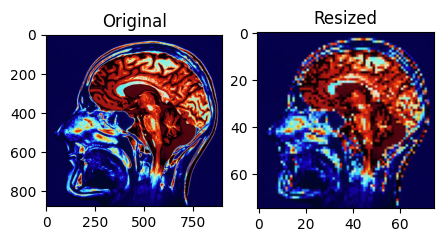

In [11]:
width = 75 #@param {type:"slider", min:0, max:850, step:50}
height = 75 #@param {type:"slider", min:0, max:850, step:50}

img_resize = cv2.resize(img, (width, height))

plt.figure(figsize=(5, 3))
plt.subplot(1, 2, 1), plt.imshow(img), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(img_resize), plt.title('Resized')
plt.show()

Notice that this function does not care about the ***aspect ratio*** (i.e., the width-to-height ratio) of our original image. If we resize our image to a different aspect ratio, the image becomes stretched and distorted.

If you want to resize your image while avoiding distortion, you will need to scale both dimensions by the same factor. If you do this, note that the `cv2.resize()` function requires that the new dimensions are specified as integers since there is no such thing as a fractional pixel.

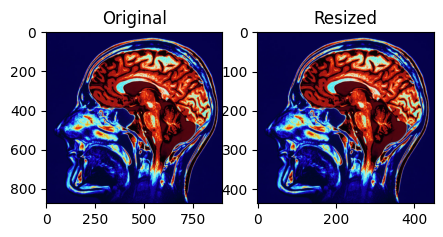

In [12]:
scale_factor = 0.5 #@param {type:"slider", min:0.25, max:1.5, step:0.25}

h, w, _ = img.shape
new_h = int(h*scale_factor)
new_w = int(w*scale_factor)
img_resize = cv2.resize(img, (new_w, new_h))

plt.figure(figsize=(5, 3))
plt.subplot(1, 2, 1), plt.imshow(img), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(img_resize), plt.title('Resized')
plt.show()

# Rotating

While you likely won't need to rotate images very often for the sake of image analysis, it can be useful to know how to do it if you are given images in the wrong orientation. `opencv` does not provide a clean function for rotating images, but what it does provide is a function called `cv2.warpAffine()`. This function allows you to use matrix multiplication to map each point ($x$, $y$) in your original image to a new point ($x'$, $y'$) in a new image.

`opencv` also provides a function called `cv2.getRotationMatrix2D()` that allows us to generate the matrix we would need to rotate an image by `angle` degrees around a point `center`. Positive angles rotate the image counter-clockwise, while negative angles rotate the image clockwise. Most of the time, we are going to want to rotate an image around the middle, so the code would look as follows:

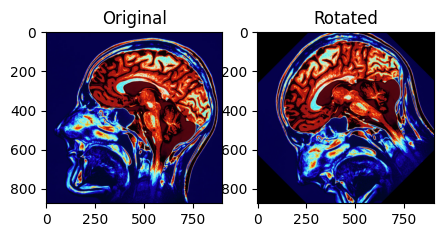

In [13]:
theta = 45 #@param {type:"slider", min:0, max:360, step:45}

h, w, _ = img.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle=theta, scale=1.0)
img_rotate = cv2.warpAffine(img, M, (w, h))

plt.figure(figsize=(5, 3))
plt.subplot(1, 2, 1), plt.imshow(img), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(img_rotate), plt.title('Rotated')
plt.show()

You'll notice that for angles that are not a multiple of 90$^\circ$, some parts of the image get clipped and other parts of the image become black. That's because the size of the image array does not change during this process. Therefore, you will need to think carefully about the implications of rotating your image. For example, if you only care about the middle of the rotated image, you might consider cropping an ROI so that the result does not have any blank spaces.